In [1]:
pwd

'C:\\Users\\KUMAR SANJIB RAY'

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [39]:
df= pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [40]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [41]:
corr=df.corr()

<AxesSubplot:>

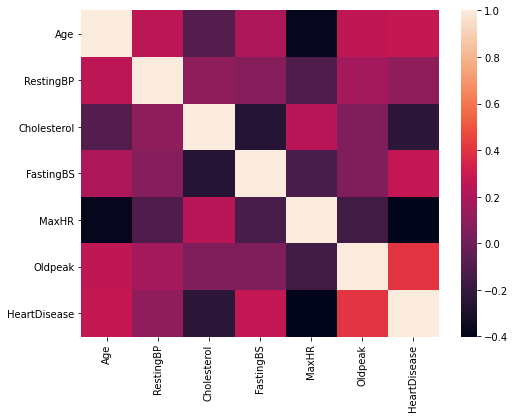

In [42]:
sns.heatmap(corr)

In [43]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [44]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [45]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [46]:
from  sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])


In [47]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [48]:
X=df.iloc[ : , :11]
y=df.iloc[ : , -1:]

In [49]:

y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [50]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


Feature 0 : 79.161
Feature 1 : 94.253
Feature 2 : 161.185
Feature 3 : 10.727
Feature 4 : 52.46
Feature 5 : 70.479
Feature 6 : 3.026
Feature 7 : 174.914
Feature 8 : 296.145
Feature 9 : 178.615
Feature 10 : 415.83



c:\users\kumar sanjib ray\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


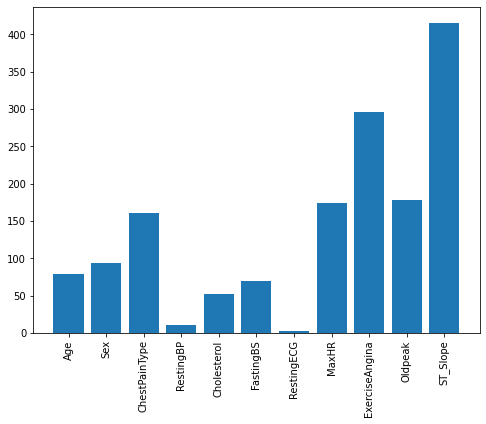

In [51]:
from sklearn.feature_selection import SelectKBest, chi2,f_classif


Kbest_classif = SelectKBest(score_func=f_classif, k=11)
Kbest_classif.fit(X,y)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([X.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

In [52]:
from sklearn.feature_selection import SelectKBest
SelectKBest = SelectKBest(X,y)
SelectKBest

c:\users\kumar sanjib ray\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=     HeartDisease
0               0
1               1
2               0
3               1
4               0
..            ...
913             1
914             1
915             1
916             1
917             0

[918 rows x 1 columns] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SelectKBest(k=     HeartDisease
0               0
1               1
2               0
3               1
4               0
..            ...
913             1
914             1
915             1
916             1
917             0

[918 rows x 1 columns],
            score_func=     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57   

In [53]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(f_classif,k=4)
sel_five_cols.fit(X,y)
X.columns[sel_five_cols.get_support()]

c:\users\kumar sanjib ray\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'], dtype='object')

In [54]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['HeartDisease','Cholesterol','Sex','Age','FastingBS','RestingBP','RestingECG','ChestPainType'],
                                                       axis=1),df['HeartDisease'],test_size=0.2,random_state=0)

In [55]:
X_train.head()

,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,157,1,2.0,1
356,113,1,1.5,1
738,151,0,0.8,2
85,94,1,1.0,1
427,117,1,1.0,1


In [56]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')
model.fit(X_train,y_train)
PREDICTIONS=model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,PREDICTIONS))


              precision    recall  f1-score   support

           0       0.71      0.71      0.71        77
           1       0.79      0.79      0.79       107

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.76      0.76       184



In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
PREDICTIONS=model.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,PREDICTIONS))


              precision    recall  f1-score   support

           0       0.66      0.74      0.70        77
           1       0.80      0.73      0.76       107

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.74      0.73      0.74       184



In [60]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, y_train)
PREDICTIONS=model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,PREDICTIONS))


              precision    recall  f1-score   support

           0       0.72      0.75      0.74        77
           1       0.82      0.79      0.81       107

    accuracy                           0.78       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184

